In [ ]:
''' Our data is loaded in Google drive
 Importing the library for mounting the Google drive '''

from google.colab import drive

In [ ]:
# Mounting the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Getting the libraries
# segmentation-model-pytorch
# alumentations - the augmentation library

!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=b0acde6ec77b589e67258f0991d7d74f7feb31920019319552612e40eff78f5e
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=85570bd68cd9e1c77b3e0603ea2e9

In [ ]:
# For seeing the TEST images, defining a similar function like the previous one

def show_test_image(test_image):
  f, (ax1) = plt.subplots(1, figsize=(10,5))

  ax1.set_title('TEST_IMAGE')
  ax1.imshow(test_image.permute(1,2,0).squeeze(), cmap = 'gray')


In [ ]:
# Importing the libraries
'''
- torch as in pytorch
- cv2 is the openCV
- numpy for ndimentional array operations
- pandas for dataframes
- matplotlib for visualization
- sklearn for spliting the data into training and validation set
- tqdm for the progress bar
'''

import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [ ]:
# Creating the path and data directory... train.csv for csv_file.....
# and the dataset is present in the '/Colab Notebooks/...', so data directory is 'Colab Notebooks'
# # Defining the names and assigning the values into it, the CSV files and data directory and
# Using timm-efficient-b0 encoder for the model
# timm is nothing but (py)Torch Image Model
# Imagenet weights are used


DEVICE = "cuda:0" if torch.cuda.is_available else "cpu"
EPOCHS = 300
LR = 0.003
BATCH_SIZE = 3

ENCODER = 'timm-efficientnet-b0'
WEIGHTS = 'imagenet'

In [ ]:
# Reading the train and test dataframes
# Showing the train dataframe

# df = pd.read_csv(CSV_FILE)
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segmentation_DL_data/batch_test.csv')
# df.head

In [ ]:
# showing the test dataframe

df1

,test_images
0,/content/drive/MyDrive/Colab Notebooks/Segment...
1,/content/drive/MyDrive/Colab Notebooks/Segment...
2,/content/drive/MyDrive/Colab Notebooks/Segment...
3,/content/drive/MyDrive/Colab Notebooks/Segment...
4,/content/drive/MyDrive/Colab Notebooks/Segment...
...,...
263,/content/drive/MyDrive/Colab Notebooks/Segment...
264,/content/drive/MyDrive/Colab Notebooks/Segment...
265,/content/drive/MyDrive/Colab Notebooks/Segment...
266,/content/drive/MyDrive/Colab Notebooks/Segment...


In [ ]:
# for locating the index of testing in dfs
row_test = df1.iloc[1]

In [ ]:
# defining the paths of the test images
# same for test images as prev operation

test_image_path = row_test.test_images

In [ ]:
# Reading the test images using cv2 module, and converting them into RGB format
# as opencv(cv2) reads images in BGR format

test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

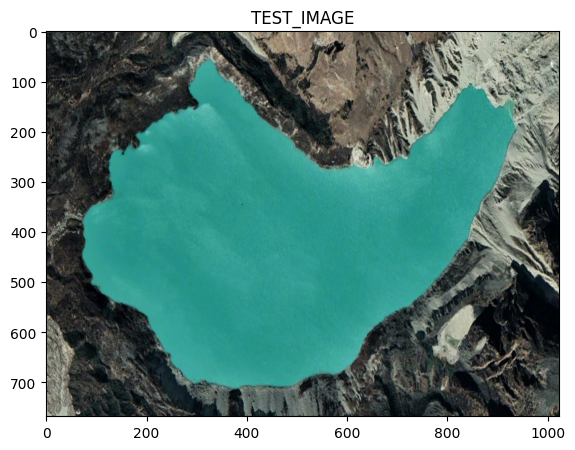

In [ ]:
# Test image visualization
f, (ax1) = plt.subplots(1, figsize=(10,5))

ax1.set_title('TEST_IMAGE')
ax1.imshow(test_image)

In [ ]:
# For test-set

test_df = df1

In [ ]:
# seeing the items in trainig dataframe

test_df.head()

,test_images
0,/content/drive/MyDrive/Colab Notebooks/Segment...
1,/content/drive/MyDrive/Colab Notebooks/Segment...
2,/content/drive/MyDrive/Colab Notebooks/Segment...
3,/content/drive/MyDrive/Colab Notebooks/Segment...
4,/content/drive/MyDrive/Colab Notebooks/Segment...


In [ ]:
# importing a library of data augmentation

import albumentations as A

In [ ]:
# For test-set
def get_test_augs():
  return A.Compose([
      A.Resize(768, 1024, always_apply=True)
                    ], is_check_shapes = 0)

In [ ]:
# here, to write the custom dataset...
# reason is to get the image and mask pair, according to the given index
# So, first importing the dataset class from torch


from torch.utils.data import Dataset

In [ ]:
# FOR test data class SegmentationDataset(Dataset):

# now let's name our dataset as segmentationTestDataset and we'll inherit the dataset class

# inside this class we'll have three methods.. first is __init__ method, where we'll pass our dataframe, augmentations,

# first is __init__ method, where we'll pass our dataframe, augmentations....there we'll initialize dataframe, augmentations

# Second method is the __len__ method, which will return the length of the dataset... return len(self.df)

# Third is the __getitem__ method, this method will return the image and mask pair according to the given index..so in this method we'll do the same thing
# which we did in task 2, where we have passed the index here, then we've selected the row, then we extracted the mask path, we've read the image and mask
### here, row = self.df.iloc[idx] here the index is passed ..then image_path and mask_path...then we'll read the image...image is cv2.imread..will pass image
# then change that from BGR to RGB, in which image is passed...same for masks also...mask will be grayscale, so specifiy that.. ..there the mask will have a
# shape of (h, w) height and width..there we'll add one extra dimension, channel (that'll be 1, as it is grayscale)..for that
# mask = np.expand_dims(mask, axis = -1) .. here mask is passed, and we want to add the last axis
# then we'll apply the augmentation..that augmentation will be true..where we'll pass mask = mask and image = image...now this augmentation will return the
# mask and images in dictionary fromat..so that 'data' is holding key as images, and mask as value.. ..there we'll separate that.. we'll try to extract, then
# image=data['image']...similarly, mask = data['mask']

# now, then we'll shift the channels to the 0th axis, that is Pytorch uses Channel, Height , Width convention...but, now our images are in Height, Width, Channel
# so, here it'll be image = np.transpose(image, (2,0,1)).astype(np.float32)..pass image, then we want channel to be in 0th axis, so here height as 0th axis,
# width is on 1st axis and channel is on 2nd axis..after performing this opeartion the channel will be on 0th axis, so there we'll write the c, channel at first
# then the height width...and also specify the datatype astype(np.float32)...and now do this same thing for mask

# now finall we're going to convert this from Numpy to Tensor, and that belong in 0 to 1 so divide by 255...for mask round up the values...
# image = torch.Tensor(image) / 255 ...and... mask = torch.round(torch.Tensor(mask) / 255) ...then we'll return the image and mask

class SegmentationTestDataset(Dataset):


  def __init__(self, df1, augmentations):

    self.df1 = df1
    self.augmentations = augmentations
    # self.augmentations = augmentations

  def __len__(self):
    return len(self.df1)

  def __getitem__(self, idx):

    row_test = self.df1.iloc[idx]

    test_image_path = row_test.test_images

    test_image = cv2.imread(test_image_path)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    test_image = np.transpose(test_image, (2,0,1)).astype(np.float32)

    test_image = torch.Tensor(test_image) / 255

    return test_image

In [ ]:
# For test-set
testset = SegmentationTestDataset(test_df, get_test_augs())

In [ ]:
# seeing the size of testset

print(f"Size of Testset : {len(testset)}")

Size of Testset : 268


In [ ]:
import matplotlib.image as mpi
import matplotlib.pyplot as plt
%matplotlib inline

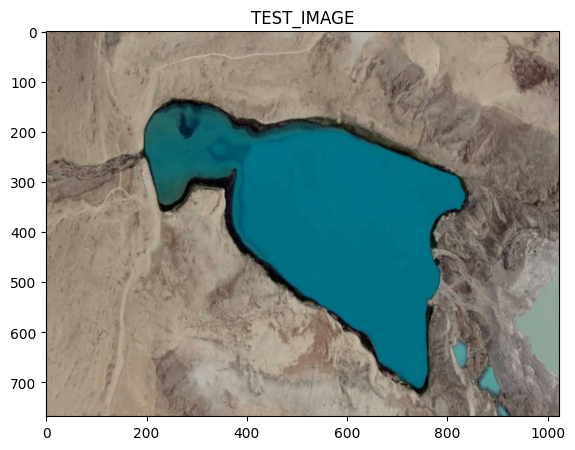

In [ ]:
# now plotting one of the test images ...
# first define the index...then test_image = testset ..and there passing the index

idx = 3
test_image = testset[idx]
show_test_image(test_image)

In [ ]:
print(test_image.shape)
# print(image.shape)
# print(mask.shape)

torch.Size([3, 768, 1024])


In [ ]:
# here we'll load the dataset into batches using dataloader

from torch.utils.data import DataLoader

In [ ]:
# Same for test-set

testloader = DataLoader(testset)

In [ ]:
# for TEST
for test_image in testloader:
  break

  print(f'One batch image shape: {test_image.shape}')


In [ ]:
# we'll use UNET...segmentation models are mainly based on Auto-encoder, which have an Encoder and Decoder network..
# ..now we're using Unet, we can pass the Autoencoder Resnet 34, resnet 18 etc..there are also pretrained autoencoders, with weights imagenet
# we'll use the efficient_net...the TIMM version ...... efficient_net_b0 as encoder and Unet as Segmentation model
# in Segmentation training, we need a segmentation loss... we're using DICE_LOSS

from torch import nn
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import DiceLoss

In [ ]:
# FOR TEST

class SegmentationTestModel(nn.Module):

  def __init__(self):
    super(SegmentationTestModel, self).__init__()

    self.arc = smp.Unet(
        encoder_name = ENCODER,
        encoder_weights = WEIGHTS,
        in_channels = 3,
        classes = 1,
        activation = None
    )

  def forward(self, test_image):

    logits = self.arc(test_image)

    return logits

In [ ]:
# For TEST

model_test = SegmentationTestModel()
model_test.to(DEVICE)

Downloading: "https://github.com/huggingface/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b0-0af12548.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b0-0af12548.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 160MB/s]


SegmentationTestModel(
  (arc): Unet(
    (encoder): EfficientNetEncoder(
      (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): Swish()
      )
      (blocks): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (bn1): BatchNormAct2d(
              32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
              (drop): Identity()
              (act): Swish()
            )
            (se): SqueezeExcite(
              (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (act1): Swish()
              (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (gate): Sigmoid()
            )
       

In [ ]:
# Binary

import os
import time
import torchvision.transforms as transforms

# Define the output folder path
output_folder = '/content/drive/MyDrive/Colab Notebooks/Batch processed images/Feature 3 - Retreating Glacier/Binary'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)


# Define the transformation to convert the predicted mask to PIL image
transform = transforms.ToPILImage()



# Working

model_test.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Segmentation_DL_data/Trained Models/Feature - 3 - Retreating Glacier - Trained Models/Feature-3_150_images_Model_b-0_0.001_150its.pt'))


tic = time.perf_counter()
# Iterate over idx values from 0 to 10
for idx in range(268):
    test_image = testset[idx]
    logits_mask = model_test(test_image.to(DEVICE).unsqueeze(0))
    pred_mask_test = torch.sigmoid(logits_mask)
    pred_mask_test = ((pred_mask_test > 0.5)*1).float()

    # Convert the predicted mask to PIL image
    pred_mask_img = transform(pred_mask_test.squeeze())

    # Save the predicted mask image with the corresponding idx value
    image_path = os.path.join(output_folder, f"{idx}.jpg")
    pred_mask_img.save(image_path)

    print(f"Saved output for idx {idx}")


toc = time.perf_counter()

Saved output for idx 0
Saved output for idx 1
Saved output for idx 2
Saved output for idx 3
Saved output for idx 4
Saved output for idx 5
Saved output for idx 6
Saved output for idx 7
Saved output for idx 8
Saved output for idx 9
Saved output for idx 10
Saved output for idx 11
Saved output for idx 12
Saved output for idx 13
Saved output for idx 14
Saved output for idx 15
Saved output for idx 16
Saved output for idx 17
Saved output for idx 18
Saved output for idx 19
Saved output for idx 20
Saved output for idx 21
Saved output for idx 22
Saved output for idx 23
Saved output for idx 24
Saved output for idx 25
Saved output for idx 26
Saved output for idx 27
Saved output for idx 28
Saved output for idx 29
Saved output for idx 30
Saved output for idx 31
Saved output for idx 32
Saved output for idx 33
Saved output for idx 34
Saved output for idx 35
Saved output for idx 36
Saved output for idx 37
Saved output for idx 38
Saved output for idx 39
Saved output for idx 40
Saved output for idx 41
Sa

In [ ]:
print(f"Time taken for exporting {idx+1} is {(toc-tic)/60} Minutes")

Time taken for exporting 268 is 1.9070776278166661 Minutes


In [ ]:
#### # CODE for Exact Feature

import os
import torchvision.transforms as transforms
import time

# Define the transformation to convert the predicted mask to PIL image
transform = transforms.ToPILImage()

# Define the output folder path
output_folder = '/content/drive/MyDrive/Colab Notebooks/Batch processed images/Feature 3 - Retreating Glacier/Exact Feature'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

model_test.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Segmentation_DL_data/Trained Models/Feature - 3 - Retreating Glacier - Trained Models/Feature-3_150_images_Model_b-0_0.001_150its.pt'))

tic2 = time.perf_counter()

# Iterate over idx values from 0 to 10
for idx in range(268):
    test_image = testset[idx]
    logits_mask = model_test(test_image.to(DEVICE).unsqueeze(0))
    pred_mask_test = torch.sigmoid(logits_mask)
    pred_mask_test = ((pred_mask_test > 0.5)*1).float()


    input_image_tn = test_image
    vis_input_image_tn = np.squeeze(input_image_tn)
    vis_input_image_tn_np = vis_input_image_tn.numpy()

    pred_image_tn = pred_mask_test.detach().cpu().squeeze(0)
    vis_pred_image_tn = pred_image_tn
    vis_pred_image_tn_np = vis_pred_image_tn.numpy()

    converted = vis_input_image_tn_np * vis_pred_image_tn_np

    converted_1 = cv2.merge((converted[2], converted[1], converted[0]))
    Extracted_GL_test = cv2.cvtColor(converted_1, cv2.COLOR_BGR2RGB)

    Extracted_GL_test = (Extracted_GL_test * 255).astype(np.uint8)
    Extracted_GL_test = transform(Extracted_GL_test)

    # Save the predicted mask image with the corresponding idx value
    image_path = os.path.join(output_folder, f"{idx+1}.jpg")

    Extracted_GL_test.save(image_path)

    # cv2.imwrite(os.path.join(output_folder, f"{idx+1}.jpg"), Extracted_GL_test)

    print(f"Saved output for idx {idx}")

toc2 = time.perf_counter()

Saved output for idx 0
Saved output for idx 1
Saved output for idx 2
Saved output for idx 3
Saved output for idx 4
Saved output for idx 5
Saved output for idx 6
Saved output for idx 7
Saved output for idx 8
Saved output for idx 9
Saved output for idx 10
Saved output for idx 11
Saved output for idx 12
Saved output for idx 13
Saved output for idx 14
Saved output for idx 15
Saved output for idx 16
Saved output for idx 17
Saved output for idx 18
Saved output for idx 19
Saved output for idx 20
Saved output for idx 21
Saved output for idx 22
Saved output for idx 23
Saved output for idx 24
Saved output for idx 25
Saved output for idx 26
Saved output for idx 27
Saved output for idx 28
Saved output for idx 29
Saved output for idx 30
Saved output for idx 31
Saved output for idx 32
Saved output for idx 33
Saved output for idx 34
Saved output for idx 35
Saved output for idx 36
Saved output for idx 37
Saved output for idx 38
Saved output for idx 39
Saved output for idx 40
Saved output for idx 41
Sa

In [ ]:
print(f"Time taken for exporting {idx+1} is {(toc2-tic2)/60} Minutes")

Time taken for exporting 268 is 0.49828870051666646 Minutes
